In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST(root = "./data", train = True, download = True, transform = transform)

test_data = datasets.MNIST(root = "./data", train = False, download = True, transform = transform)

print("Train Dataset:", len(train_data))
print("Test Dataset:", len(test_data))


100%|██████████| 9.91M/9.91M [00:03<00:00, 2.76MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 148kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 649kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.78MB/s]


Train Dataset: 60000
Test Dataset: 10000


In [3]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)

test_loader = DataLoader(test_data, batch_size = batch_size, shuffle= False)


print("Train_Loader:", len(train_loader))



Train_Loader: 938


In [14]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128,10))

    def forward(self, x):
        return self.model(x)

model = DigitClassifier()
print(model)


    


DigitClassifier(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.01)


In [16]:
epochs = 3
train_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)


        loss.backward()

        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss = len(train_loader)

    train_losses.append(avg_loss)

    print(f"Epoch {epoch+1}/{epochs}, loss = {avg_loss:.4f}")




Epoch 1/3, loss = 938.0000
Epoch 2/3, loss = 938.0000
Epoch 3/3, loss = 938.0000


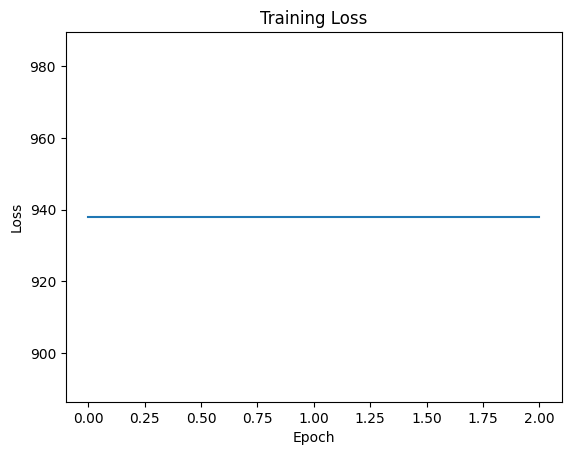

In [18]:
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [20]:
def calculate_accuracy(model, loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    return correct/total

acc = calculate_accuracy(model, test_loader)
print("Test Accuracy:", acc)

    

Test Accuracy: 0.9606


In [21]:
torch.save(model.state_dict(), "mnist_model.pth")
print("Model saved!")


Model saved!
